In [1]:
import pandas as pd
import numpy as np
import ExMAS
import ExMAS.main
import ExMAS.utils
import pprint
import itertools
import csv
import os
import osmnx as ox
import dotmap
import sys
import random
import time
import math
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

import networkx as nx #graphs
cwd = os.getcwd()

from ExMAS.utils import inData as inData
from dotmap import DotMap


In [6]:
# df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
# df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 

# params = ExMAS.utils.get_config('default_SUM.json') # load the default
# params.city = 'Krakow, Poland'
# params = ExMAS.utils.make_paths(params) # update file paths

# inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
# frac = 0.2
# params.shared_discount = 0.3
# params.nP = int(frac * len(df))
# params.simTime = 0.5
# params.t0 = params.t0.replace(hour=8)
# params.speeds.ride = 6
# params.VoT = 0.003
# params.price = 1.5
# sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
# sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 

# inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

# my_requests = inData.requests
# my_requests.destination = ox.get_nearest_node(inData.G,[50.09516, 20.06522])
# my_requests["origin"] = sample.origin.values

# my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)

# my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
# #my_requests.ttrav = (pd.to_timedelta(my_requests.ttrav) / params.speeds.ride).dt.floor('1s')
# my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
# my_requests = inData.requests
# inData.requests = my_requests
# # inData.requests.to_csv("check.csv")

# inData = ExMAS.main(inData, params)

# KPIs = inData.sblts.res.to_frame()[:23]
# KPIs['description']  = ExMAS.utils.KPIs_descriptions
# KPIs.columns = ['KPI', 'description']
# KPIs
# # KPIs.to_csv("KPIs022.csv")

In [2]:
df1 = pd.read_csv('City_requests.csv') #demografia Wzgórza Krzesławickie
df = df1.loc[df1.index.repeat(df1.ogolem)].reset_index(drop=True) #repeat Rows N times (equal "ogolem"): N Rows = N people 
params = ExMAS.utils.get_config('default_SUM.json') # load the default
params.city = 'Krakow, Poland'
params = ExMAS.utils.make_paths(params) # update file paths
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [117]:
def run_ExMAS_SUM(inData, params, hub, frac, repl):

    params.nP = int(frac * len(df))
    sample = df.sample(n = int(frac * len(df)), replace=False, weights=None, random_state=None, axis=None) # demand of RP=frac*population
    sample['origin'] = sample.apply(lambda row:  ox.get_nearest_node(inData.G, (row['y'], row['x'])), axis = 1) 
    inData = ExMAS.utils.generate_demand(inData, params) #generate trip requests

    my_requests = inData.requests
    my_requests.destination = hub[1]
    my_requests["origin"] = sample.origin.values
    my_requests['dist'] = my_requests.apply(lambda request: inData.skim.loc[request.origin, request.destination], axis=1)
    my_requests['ttrav'] = my_requests.apply(lambda request: pd.Timedelta(request.dist, 's').floor('s'), axis=1)
    my_requests.tarr = [request.treq + request.ttrav for _, request in my_requests.iterrows()]
    my_requests = inData.requests
    inData.requests = my_requests
    # inData.requests.to_csv("check.csv")
    inData = ExMAS.main(inData, params)
    KPIs = inData.sblts.res.to_frame()[:23]
    # KPIs['description']  = ExMAS.utils.KPIs_descriptions
    KPIs.columns = ['KPI']
    KPIs
    KPIs.to_csv(f'KPI_{hub[0]}_{frac}_{repl}.csv') #res/
    return KPIs



params.shared_discount = 0.2
params.simTime = 0.5
params.t0 = params.t0.replace(hour=8)
params.speeds.ride = 6
params.VoT = 0.003
params.price = 1.5
results = dict()
 
hubs = [('hub1', ox.get_nearest_node(inData.G,[50.09516, 20.06522])),   #list of hubs
        ('hub2', ox.get_nearest_node(inData.G,[50.09203901, 20.07409523]))]

for frac in  [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.005, 0.007, 0.008, 0.009, 0.01]: #list of frac 0.003, 0.005, 0.007, 0.009, 0.01
    for h in hubs:
        for i in range(10): 
            print(h[0], frac, i + 1)
            results[frac] = run_ExMAS_SUM(inData, params, h, frac, i)

hub1 0.0005 1
18-01-24 13:05:27-INFO-Initializing pairwise trip shareability between 1 and 1 trips.
18-01-24 13:05:27-INFO-creating combinations
18-01-24 13:05:27-INFO-0	 nR*(nR-1)
18-01-24 13:05:27-INFO-Degree 2 	Completed
18-01-24 13:05:27-INFO-No more trips to exted at degree 2
18-01-24 13:05:27-INFO-Matching 1 trips to 1 rides in order to minimize u_veh
18-01-24 13:05:27-INFO-Problem solution: Optimal. 
Total costs for single trips:            270 
reduced by matching to:                  270
18-01-24 13:05:27-INFO-Calculations  completed
18-01-24 13:05:27-INFO-DotMap(VehHourTrav=270, VehHourTrav_ns=270, PassHourTrav=270, PassHourTrav_ns=270, PassUtility=3.2445, PassUtility_ns=3.2445, mean_lambda=nan, revenue_s=324.0, revenue_ns=405.0, Fare_Discount=-0.2, nR=1, SINGLE=1, PAIRS=0, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.0, fleet_size_nonshared=1.0, fleet_size_shared=1.0, lambda_shared=0)
hub1 0.0005 2
18-01-24 13:05:28-INFO-Initializing pairwise trip shareabilit

In [132]:
results = {}
for num, frac, rep in list(itertools.product([1, 2], [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.005, 0.007, 0.008, 0.01], range(10))):
    results[str((num, frac, rep))] = pd.read_csv('KPI_hub' + str(num) + "_" + str(frac) + "_" + str(rep) + ".csv")["KPI"]
indexes = pd.read_csv('KPI_hub' + str(num) + "_" + str(frac) + "_" + str(rep) + ".csv", index_col=0).index
dfr = pd.DataFrame(results)
dfr.index = indexes
old_indexes = list(dfr.index).copy()
dfr = dfr.append({t: t[1] for t in dfr.columns}, ignore_index=True)
dfr.index = old_indexes + ["hub"]
# print(dfr)
dfr.to_csv('result.csv')

In [133]:
pd.read_csv('result.csv', header=None).T.to_csv('resultT.csv', header=False, index=False)

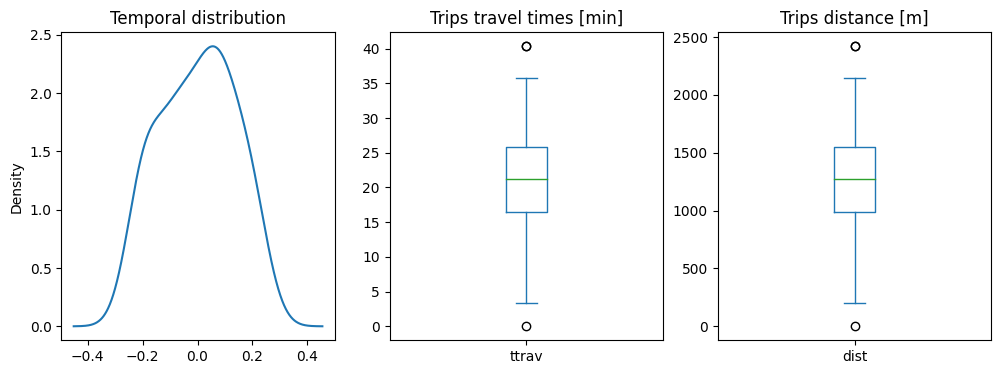

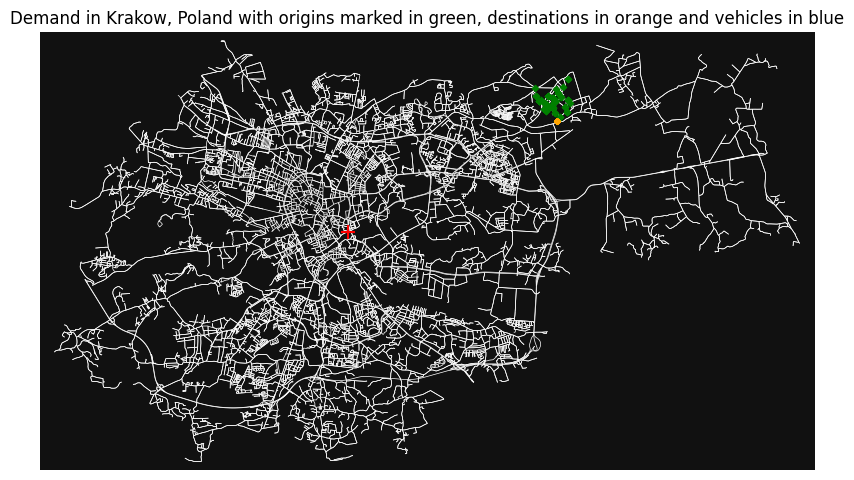

In [5]:
ExMAS.utils.plot_demand(inData, params)

# plotting #

In [136]:
dfT = pd.read_csv('resultT.csv', index_col=0) # discount 0.2

dfT['del_VehHourTrav']=abs(dfT['VehHourTrav']-dfT['VehHourTrav_ns'])/dfT['VehHourTrav_ns']           # KPI1: vehicle hours reduction
dfT['del_PassUtility']=abs((dfT['PassUtility']-dfT['PassUtility_ns'])/dfT['PassUtility_ns'])      # KPI2: travellers utility gains
dfT['Occupancy']=dfT['PassHourTrav']/dfT['VehHourTrav']                                       # KPI4: occupancy
dfT['del_PassHourTrav']=abs((dfT['PassHourTrav']-dfT['PassHourTrav_ns'])/dfT['PassHourTrav_ns'])  # KPI5: passenger hours increase
dfT['del_fleet_size']=abs((dfT['fleet_size_shared']-dfT['fleet_size_nonshared'])/dfT['fleet_size_nonshared'])  # KPI6: potential fleet size reduction                  
                  
dfT['frac'] = round((dfT['nR'] / len(df)),4)


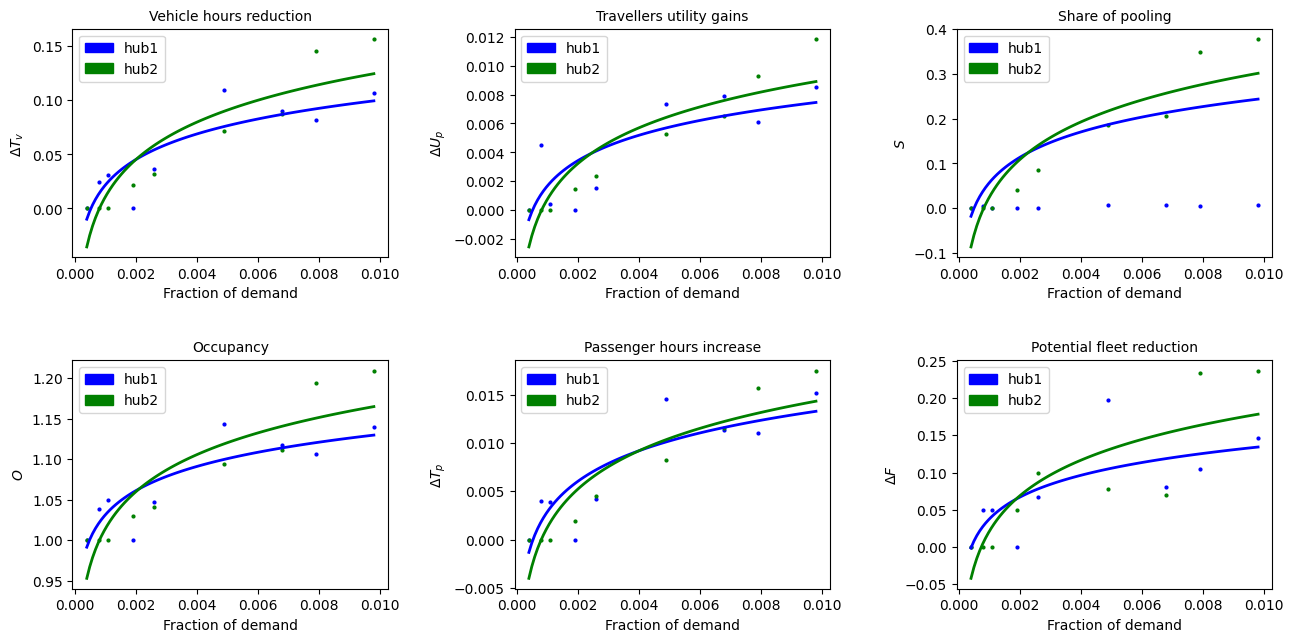

In [142]:
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.patches as mpatches
from cycler import cycler


def plot_log_fit(x,y,ax, color = 'black'):
    popt, pcov = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x,y )
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.log(b * x_fitted) + c
    ax.plot(x_fitted, y_fitted, lw = 2, color = color)

fig, axes = plt.subplots(2,3, figsize = (12,8))
axes = axes.flatten()

ax=axes[0]
to_plot = dfT[(dfT.hub == 1)]
# sns.regplot(data = to_plot, x = 'frac', y = 'del_VehHourTrav', 
#             scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'lightblue'}, ax = ax, 
#             line_kws = {'lw':0}, ci =None)
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
# sns.regplot(data = to_plot, x = 'frac', y = 'del_VehHourTrav', 
#             scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'lightgreen'}, ax = ax, 
#             line_kws = {'lw':0}, ci =None)
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta T_v$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Vehicle hours reduction", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')


ax=axes[1]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta U_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Travellers utility gains", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')


ax=axes[2]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$S$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Share of pooling", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')

ax=axes[3]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$O$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Occupancy", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')

ax=axes[4]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.del_PassHourTrav, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_PassHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta T_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Passenger hours increase", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')

ax=axes[5]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.del_fleet_size, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_fleet_size.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta F$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Potential fleet reduction", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')

plt.subplots_adjust(left=0,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.45)

# plt.savefig('WK_2hubs_discount0.2.jpg', dpi=300)

In [ ]:
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.patches as mpatches
from cycler import cycler


def plot_log_fit(x,y,ax, color = 'black'):
    popt, pcov = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, x,y )
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.log(b * x_fitted) + c
    ax.plot(x_fitted, y_fitted, lw = 2, color = color)

fig, axes = plt.subplots(2,3, figsize = (12,8))
axes = axes.flatten()

ax=axes[0]
to_plot = dfT[(dfT.hub == 1)]
# sns.regplot(data = to_plot, x = 'frac', y = 'del_VehHourTrav', 
#             scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'lightblue'}, ax = ax, 
#             line_kws = {'lw':0}, ci =None)
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
# sns.regplot(data = to_plot, x = 'frac', y = 'del_VehHourTrav', 
#             scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'lightgreen'}, ax = ax, 
#             line_kws = {'lw':0}, ci =None)
plot_log_fit(to_plot.frac, to_plot.del_VehHourTrav, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_VehHourTrav.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta T_v$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Vehicle hours reduction", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')


ax=axes[1]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.del_PassUtility, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$\Delta U_p$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Travellers utility gains", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')


ax=axes[2]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).del_PassUtility.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.shared_ratio, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).shared_ratio.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$S$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Share of pooling", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')

ax=axes[3]
to_plot = dfT[(dfT.hub == 1)]
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'blue')
to_plot = dfT[(dfT.hub == 1)].groupby(dfT.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='blue', marker = 'o')

to_plot = dfT[(dfT.hub == 2)]
plot_log_fit(to_plot.frac, to_plot.Occupancy, ax, 'green')
to_plot = dfT[(dfT.hub == 2)].groupby(dfT.frac).Occupancy.mean()
ax.scatter(x=to_plot.index,y=to_plot.values, s = 4, color='green', marker = 'o')

ax.set_ylabel("$O$", fontsize=10)
ax.set_xlabel("Fraction of demand", fontsize=10)
ax.set_title("Occupancy", fontsize=10, fontweight='normal')
legend_dict = { 'hub1': 'blue', 'hub2' : 'green'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

ax.legend(handles=patchList, loc='upper left')



plt.subplots_adjust(left=0,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.45)
